<a href="https://colab.research.google.com/github/fjrsales/tecnicasComputacionais/blob/main/aula%2003/int0040_aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução / Revisão - Python

## Arquivos e Strings - Representações frequentes

## Padrão 1. Arquivos do tipo valores separados por vírgula [ponto e vírgula, 'pipes', tabulações...]

Arquivos separados por vírgula são muito utilizados quando desejamos armazenar valores de uma forma estruturada como, por exemplo, em tabelas. Essa modalidade de arquivo facilita a legibilidade e é facilmente importada em programas de manipulação de tabelas como o [Microsoft Excel](https://www.office.com/launch/excel) ou o [Google Planilhas](https://https://docs.google.com/spreadsheets/u/0/).

In [ ]:
import os
os.listdir('sample_data')

['README.md',
 'anscombe.json',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

#### Leitura de arquivos -- função [open](https://docs.python.org/3/library/functions.html#open)

In [ ]:
# file = './sample_data/california_housing_train.csv'
file = '/content/sample_data/california_housing_test.csv'
with open(file,'r') as f:
  # Lendo o arquivo inteiro
  #temp = f.read() ## atinjo o final do arquivo
  # print(f.read())
  # Leitura linha a linha
  # line = f.readline()
  while True:
    s = f.readline()
    if(s == ''):
      break
    print(s)
  #print(line)


A saída de streaming foi truncada nas últimas 5000 linhas.
-118.410000,34.030000,36.000000,3053.000000,635.000000,1234.000000,577.000000,5.163700,500001.000000

-121.450000,38.610000,32.000000,2436.000000,612.000000,1509.000000,618.000000,1.042400,81400.000000

-117.250000,32.830000,17.000000,2075.000000,262.000000,704.000000,241.000000,10.952900,500001.000000

-119.800000,36.820000,24.000000,5377.000000,1005.000000,2010.000000,982.000000,3.454200,121200.000000

-121.310000,38.010000,22.000000,2101.000000,514.000000,1304.000000,511.000000,2.834800,101600.000000

-118.180000,34.050000,41.000000,762.000000,147.000000,817.000000,176.000000,3.750000,123100.000000

-122.130000,37.370000,30.000000,2139.000000,260.000000,742.000000,242.000000,11.806000,500001.000000

-119.750000,36.780000,28.000000,3257.000000,752.000000,1981.000000,712.000000,2.293000,71700.000000

-117.090000,32.740000,42.000000,1986.000000,472.000000,1472.000000,475.000000,2.175700,110100.000000

-122.020000,37.330000,25.0

#### Ex. 1: Determine o número de linhas e colunas dos dados e apresente os nomes das variáveis das colunas


#### Abordagem 1 - Leitura linha a linha

In [ ]:
file = '/content/sample_data/california_housing_train.csv'
with open(file,'r') as f:
  lines = []
  buffer = f.readline()
  header = buffer
  while(buffer != ''):
    lines.append(buffer)
    buffer = f.readline()
  columns = header.replace("\"","").split(",")
  print('Foram lidas {} linhas com {} colunas cada.'.format(len(lines),len(columns)))  

Foram lidas 17001 linhas com 9 colunas cada.


#### Abordagem 2 - Ler o arquivo todo segmentado por linhas

In [ ]:
file = '/content/sample_data/california_housing_train.csv'
with open(file,'r') as f:
  lines = []
  buffer = f.readlines()
  print(buffer)
  header = buffer[0]
  columns = header.replace("\"","").split(",")
  print('Foram lidas {} linhas com {} colunas cada.'.format(len(buffer),len(columns)))  

['"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"\n', '-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000\n', '-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000\n', '-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000\n', '-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000\n', '-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000\n', '-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000\n', '-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000\n', '-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000\n', '-114.590000,33.61000

### Abordagem 3 - Ler blocos de dados de tamanho fixo

In [ ]:
CHUNK_SIZE = 1000
file = '/content/sample_data/california_housing_train.csv'
with open(file,'r') as f:
  buffer = f.read(CHUNK_SIZE)
  #while(buffer != ""):
  while True:
    if(buffer == ""):
      print('EOF reaached')
      break
    print(buffer)
    buffer = f.read(CHUNK_SIZE)

  
  #columns = header.replace("\"","").split(",")
  #print('Foram lidas {} linhas com {} colunas cada.'.format(len(buffer),len(columns)))  

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000
-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000
-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000
-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000
-114.590000,33.610000,34.000000,4789.000000,1175.000000,3134.000000

### O que podemos afirmar sobre as abordagens que observamos? 
- E se os arquivos não fossem de texto? 
- E se quiséssemos extrair estatísticas dos dados? Como deveríamos proceder?

### Pandas - Python for Data Analysis
Referências: [página principal](https://pandas.pydata.org/) | [documentação](https://pandas.pydata.org/docs/) | [stack overflow survey 2021](https://insights.stackoverflow.com/survey/2021#worked-with-vs-want-to-work-with-misc-tech-worked-want)

#### Estrutura de referência - DataFrame

O DataFrame é uma "planilha" com "superpoderes", isto é, temos uma série de funções e recursos disponíveis para analisar dados, inclusive com recursos para operações de leitura e escrita (I/O).

In [ ]:
import pandas as pd

df = pd.read_csv(file)
df.head()

longitude  latitude  ...  median_income  median_house_value
0     -114.31     34.19  ...         1.4936             66900.0
1     -114.47     34.40  ...         1.8200             80100.0
2     -114.56     33.69  ...         1.6509             85700.0
3     -114.57     33.64  ...         3.1917             73400.0
4     -114.57     33.57  ...         1.9250             65500.0
..        ...       ...  ...            ...                 ...
95    -115.58     32.81  ...         4.4750             96300.0
96    -115.58     32.81  ...         3.6597             87500.0
97    -115.58     32.79  ...         1.6635             64400.0
98    -115.58     32.78  ...         5.7843            110100.0
99    -115.59     32.85  ...         4.8750             90800.0

[100 rows x 9 columns]

In [ ]:
df.describe()

longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean    -119.562108     35.625225  ...       3.883578       207300.912353
std        2.005166      2.137340  ...       1.908157       115983.764387
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.790000     33.930000  ...       2.566375       119400.000000
50%     -118.490000     34.250000  ...       3.544600       180400.000000
75%     -118.000000     37.720000  ...       4.767000       265000.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


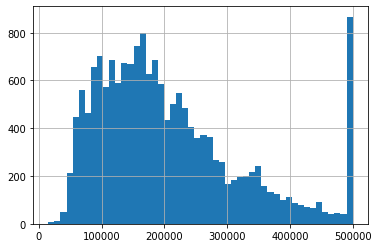

In [ ]:
df.median_house_value.hist(bins = 50)

## Padrão 2 - Arquivos com marcação
- [HTML (Hyper Text Markup Language)](https://www.w3schools.com/html/html_examples.asp)

```html
<!DOCTYPE html>
<html>
<body>

<h2>Grouping Form Data with Fieldset</h2>

<p>The fieldset element is used to group related data in a form, and the legend element defines a caption for the fieldset element.</p>

<form action="/action_page.php">
  <fieldset>
    <legend>Personalia:</legend>
    <label for="fname">First name:</label><br>
    <input type="text" id="fname" name="fname" value="John"><br>
    <label for="lname">Last name:</label><br>
    <input type="text" id="lname" name="lname" value="Doe"><br><br>
    <input type="submit" value="Submit">
  </fieldset>
</form>

</body>
</html>
```

In [ ]:
%%html
<!DOCTYPE html>
<html>
<body>

<h2>Grouping Form Data with Fieldset</h2>

<p>The fieldset element is used to group related data in a form, and the legend element defines a caption for the fieldset element.</p>

<form action="/action_page.php">
  <fieldset>
    <legend>Personalia:</legend>
    <label for="fname">First name:</label><br>
    <input type="text" id="fname" name="fname" value="John"><br>
    <label for="lname">Last name:</label><br>
    <input type="text" id="lname" name="lname" value="Doe"><br><br>
    <input type="submit" value="Submit">
  </fieldset>
</form>

</body>
</html>

- [XML (eXtensible Markup Language)](https://www.w3schools.com/xml/xml_examples.asp)

```xml
<?xml version="1.0" encoding="UTF-8"?>
<breakfast_menu>
<food>
    <name>Belgian Waffles</name>
    <price>$5.95</price>
    <description>
   Two of our famous Belgian Waffles with plenty of real maple syrup
   </description>
    <calories>650</calories>
</food>
<food>
    <name>Strawberry Belgian Waffles</name>
    <price>$7.95</price>
    <description>
    Light Belgian waffles covered with strawberries and whipped cream
    </description>
    <calories>900</calories>
</food>
<food>
    <name>Berry-Berry Belgian Waffles</name>
    <price>$8.95</price>
    <description>
    Belgian waffles covered with assorted fresh berries and whipped cream
    </description>
    <calories>900</calories>
</food>
<food>
    <name>French Toast</name>
    <price>$4.50</price>
    <description>
    Thick slices made from our homemade sourdough bread
    </description>
    <calories>600</calories>
</food>
<food>
    <name>Homestyle Breakfast</name>
    <price>$6.95</price>
    <description>
    Two eggs, bacon or sausage, toast, and our ever-popular hash browns
    </description>
    <calories>950</calories>
</food>
</breakfast_menu>

```


- [JSON (JavaScript Object Notation)](https://www.w3schools.com/js/js_json.asp)

Muito utilizado para intercâmbio de informações na internet. Tornou-se um padrão para troca de mensagens entre sistemas.

```javascript
"employees":[
  {"firstName":"John", "lastName":"Doe"},
  {"firstName":"Anna", "lastName":"Smith"},
  {"firstName":"Peter", "lastName":"Jones"}
]
```

### Manipulação desses arquivos em python

- Iremos iniciar trabalhando com arquivos JSON e XML, falaremos sobre HTML mais a frente quando falarmos sobre sistemas web.

In [ ]:
base = '<?xml version="1.0" encoding="UTF-8"?><breakfast_menu><food><name>Belgian Waffles</name><price>$5.95</price><description>Two of our famous Belgian Waffles with plenty of real maple syrup</description><calories>650</calories></food><food><name>Strawberry Belgian Waffles</name><price>$7.95</price><description>Light Belgian waffles covered with strawberries and whipped cream</description><calories>900</calories></food><food><name>Berry-Berry Belgian Waffles</name><price>$8.95</price><description>Belgian waffles covered with assorted fresh berries and whipped cream</description><calories>900</calories></food><food><name>French Toast</name><price>$4.50</price><description>Thick slices made from our homemade sourdough bread</description><calories>600</calories></food><food><name>Homestyle Breakfast</name><price>$6.95</price><description>Two eggs, bacon or sausage, toast, and our ever-popular hash browns</description><calories>950</calories></food></breakfast_menu>'


In [ ]:
print(base)

<?xml version="1.0" encoding="UTF-8"?><breakfast_menu><food><name>Belgian Waffles</name><price>$5.95</price><description>Two of our famous Belgian Waffles with plenty of real maple syrup</description><calories>650</calories></food><food><name>Strawberry Belgian Waffles</name><price>$7.95</price><description>Light Belgian waffles covered with strawberries and whipped cream</description><calories>900</calories></food><food><name>Berry-Berry Belgian Waffles</name><price>$8.95</price><description>Belgian waffles covered with assorted fresh berries and whipped cream</description><calories>900</calories></food><food><name>French Toast</name><price>$4.50</price><description>Thick slices made from our homemade sourdough bread</description><calories>600</calories></food><food><name>Homestyle Breakfast</name><price>$6.95</price><description>Two eggs, bacon or sausage, toast, and our ever-popular hash browns</description><calories>950</calories></food></breakfast_menu>


- breakfast_menu
  - food
    - name
    - price
    - description
    - calories

#### Vamos tentar extrair as informações do XML usando [expressões regulares (REGEX)](https://docs.python.org/3/library/re.html)

In [ ]:
import re

1. Como buscar os nomes das tags?

 lambda x:x.replace("/","")

In [ ]:
for tag in tags:
  tag = tag.replace("/","")

In [ ]:
o = re.compile(r'(?<=<)(.*?)(?=>)')
tags = o.findall(base) #candidatas a tags com repetição
print(tags)

# map(function,lista) --> para cada item da lista, aplicar function(item)
# lambda function --> lambda x:x.replace()
tags = map(lambda x:x.replace("/",""),tags) #aplicar a função replace em cada candidata
print(tags)

# extrair duplicatas? set(iterable) --> elementos sem repetição
tags = set(tags)
print(tags)

['?xml version="1.0" encoding="UTF-8"?', 'breakfast_menu', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', 'food', 'name', '/name', 'price', '/price', 'description', '/description', 'calories', '/calories', '/food', '/breakfast_menu']
{'price', 'breakfast_menu', 'name', 'food', 'description', '?xml version="1.0" encoding="UTF-8"?', 'calories'}


Tivemos seis candidatas a tags:{'price', 'food', 'breakfast_menu', 'calories', 'description', '?xml version="1.0" encoding="UTF-8"?', 'name'}

Dessas, temos interesse em:
- name
- price 
- description
- calories

Então, vamos aplicar regex específicas para os conteúdos das tags de interesse para recuperarmos os valores.

-- Lista de nomes

In [ ]:
p = re.compile(r'(?<=<name>)(.*?)(?=</name>)')
names = p.findall(base)
print(names)

['Belgian Waffles', 'Strawberry Belgian Waffles', 'Berry-Berry Belgian Waffles', 'French Toast', 'Homestyle Breakfast']


-- Lista de preços

In [ ]:
q = re.compile(r'(?<=<price>)(.*?)(?=</price>)')
prices = q.findall(base)
print(prices)

['$5.95', '$7.95', '$8.95', '$4.50', '$6.95']


In [ ]:
r = re.compile(r'(?<=<description>)(.*?)(?=</description>)')
descriptions = r.findall(base)
print(descriptions)

['Two of our famous Belgian Waffles with plenty of real maple syrup', 'Light Belgian waffles covered with strawberries and whipped cream', 'Belgian waffles covered with assorted fresh berries and whipped cream', 'Thick slices made from our homemade sourdough bread', 'Two eggs, bacon or sausage, toast, and our ever-popular hash browns']


In [ ]:
s = re.compile(r'(?<=<calories>)(.*?)(?=</calories>)')
calories = s.findall(base)

In [ ]:
foods = []
for name,price,desc,cals in zip(names,prices,descriptions,calories):
  item = {
      'name':name,
      'price':price,
      'description':desc,
      'calories':cals
  }
  foods.append(item)
print(foods)

[{'name': 'Belgian Waffles', 'price': '$5.95', 'description': 'Two of our famous Belgian Waffles with plenty of real maple syrup', 'calories': '650'}, {'name': 'Strawberry Belgian Waffles', 'price': '$7.95', 'description': 'Light Belgian waffles covered with strawberries and whipped cream', 'calories': '900'}, {'name': 'Berry-Berry Belgian Waffles', 'price': '$8.95', 'description': 'Belgian waffles covered with assorted fresh berries and whipped cream', 'calories': '900'}, {'name': 'French Toast', 'price': '$4.50', 'description': 'Thick slices made from our homemade sourdough bread', 'calories': '600'}, {'name': 'Homestyle Breakfast', 'price': '$6.95', 'description': 'Two eggs, bacon or sausage, toast, and our ever-popular hash browns', 'calories': '950'}]


### JSON - JavaScript Object Notation --> Web